In [ ]:
# Install the necessary libraries
!pip install torch diffusers transformers

# Import the required modules
import torch
from diffusers import StableDiffusionPipeline

# Check if a GPU is available, if not, default to CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the Stable Diffusion model from Hugging Face
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

# Define your text prompt
prompt = "A futuristic city with flying cars and neon lights at night."

# Generate the image using the model
with torch.no_grad():
    image = pipe(prompt).images[0]

# Save the generated image
image.save("generated_image.png")

# Display the image in the Colab notebook
image.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.8 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Define your text prompt
prompt = "parents teachers meeting"

# Generate the image using the model
with torch.no_grad():
    image = pipe(prompt).images[0]

# Save the generated image
image.save("generated_image.png")

# Display the image in the Colab notebook
image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------

In [ ]:
pip install torch torchvision transformers

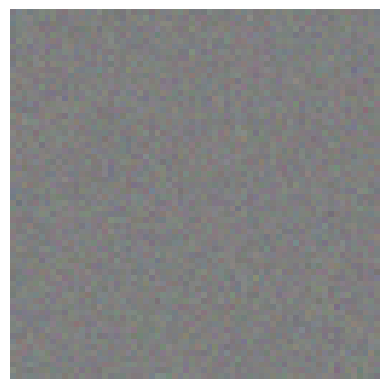

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel

# Text Encoder (Using BERT)
class TextEncoder(nn.Module):
    def __init__(self):
        super(TextEncoder, self).__init__()
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')

    def forward(self, text):
        encoded_input = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        outputs = self.bert_model(**encoded_input)
        text_features = outputs.last_hidden_state[:, 0, :]  # CLS token representation
        return text_features

# Generator (Takes text embedding and noise to generate image)
class Generator(nn.Module):
    def __init__(self, text_dim, noise_dim, img_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(text_dim + noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, img_size * img_size * 3),
            nn.Tanh()  # Output in range [-1, 1]
        )
        self.img_size = img_size

    def forward(self, text_embedding, noise):
        input_vector = torch.cat([text_embedding, noise], dim=1)
        img = self.fc(input_vector)
        img = img.view(img.size(0), 3, self.img_size, self.img_size)  # Reshape to image format
        return img

# Discriminator (Classifies real or fake images and checks text-image correspondence)
class Discriminator(nn.Module):
    def __init__(self, img_size, text_dim):
        super(Discriminator, self).__init__()
        self.fc_img = nn.Sequential(
            nn.Linear(img_size * img_size * 3, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2)
        )
        self.fc_text = nn.Sequential(
            nn.Linear(text_dim, 256),
            nn.LeakyReLU(0.2)
        )
        self.fc_final = nn.Sequential(
            nn.Linear(256 + 256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Probability of being real/fake
        )

    def forward(self, img, text_embedding):
        img_flat = img.view(img.size(0), -1)  # Flatten the image
        img_features = self.fc_img(img_flat)
        text_features = self.fc_text(text_embedding)
        combined_features = torch.cat([img_features, text_features], dim=1)
        validity = self.fc_final(combined_features)
        return validity

# Hyperparameters
img_size = 64
text_dim = 768  # BERT text embedding dimension
noise_dim = 100
batch_size = 32

# Initialize models
text_encoder = TextEncoder()
generator = Generator(text_dim, noise_dim, img_size)

# Example text input
text = ["A bird with red wings and a short beak"]

# Forward pass through the Text Encoder
text_embedding = text_encoder(text)

# Repeat text_embedding to match the batch size of noise
text_embedding = text_embedding.repeat(batch_size, 1)

# Sample random noise
noise = torch.randn(batch_size, noise_dim)

# Generate an image from text and noise
generated_img = generator(text_embedding, noise)

# Select the first generated image (from batch) and visualize it
generated_img = generated_img[0].detach().cpu()

# Rescale the pixel values from [-1, 1] to [0, 1]
generated_img = (generated_img + 1) / 2

# Convert the image tensor to NumPy and visualize
plt.imshow(generated_img.permute(1, 2, 0).numpy())
plt.axis('off')  # Hide axis
plt.show()